# **Data Preparation**

## **Load data.**

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/BryanRizqiev/host/master/heart.csv'
data = pd.read_csv(url)

display(data.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## **Data yang tidak valid.**

In [ ]:
data.drop(data[data['ca'] == 4].index, inplace=True)
data.drop(data[data['thal'] == 0].index, inplace=True)

## **Mencari missing value dan mengatasi masalah missing value jika ada.**

In [ ]:
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## **Mencari duplicate value dan menyelesaikan masalah duplicate value jika ada.**

In [ ]:
duplicate_value = data.duplicated()

print(f'Total data : {len(data)}')
print(f'Total duplikasi : {duplicate_value.sum()}')

Total data : 1000
Total duplikasi : 704


Karena yang terdeteksi duplicate terlalu banyak, maka kita biarkan data duplicate tersebut.

## **Konversi tipe data.**

In [ ]:
# Fitur categorical
categorical_feature = data.select_dtypes(include='number')
unique_counts = categorical_feature.nunique()
categorical_feature = unique_counts[unique_counts < 6].index.to_list()

# Fitur numerical
numerical_feature = data.select_dtypes(include='number')
unique_counts = numerical_feature.nunique()
numerical_feature = unique_counts[unique_counts > 20].index.to_list()

print(f'Feature categorical : {categorical_feature}, length : {len(categorical_feature)}')
print(f'Feature numerical : {numerical_feature}, length : {len(numerical_feature)}')

Feature categorical : ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target'], length : 9
Feature numerical : ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], length : 5


In [ ]:
for col in categorical_feature:
  data[col] = data[col].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1000 non-null   int64   
 1   sex       1000 non-null   category
 2   cp        1000 non-null   category
 3   trestbps  1000 non-null   int64   
 4   chol      1000 non-null   int64   
 5   fbs       1000 non-null   category
 6   restecg   1000 non-null   category
 7   thalach   1000 non-null   int64   
 8   exang     1000 non-null   category
 9   oldpeak   1000 non-null   float64 
 10  slope     1000 non-null   category
 11  ca        1000 non-null   category
 12  thal      1000 non-null   category
 13  target    1000 non-null   category
dtypes: category(9), float64(1), int64(4)
memory usage: 56.9 KB


## **Memeriksa outlier.**

In [ ]:
import plotly.express as px
from random import randrange

def show_boxplot_in_numericdata (data):
  numerical_feature = data.select_dtypes(exclude='category')

  colors = ['red', 'green', 'blue', 'orange', 'purple']
  for col, color in zip(numerical_feature, colors):
    fig_age = px.box(numerical_feature, x=col, points="all", title=f'<b>Boxplot {col}<b>', color_discrete_sequence=[color], width=600, height=400)
    fig_age.show()

In [ ]:
show_boxplot_in_numericdata(data)

## **Menghapus outlier.**

In [ ]:
def delete_outliers(data, col):
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)

  IQR = Q3 - Q1

  upper_bound = Q3 + 1.5 * IQR
  lower_bound = Q1 - 1.5 * IQR

  return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [ ]:
columns_contains_outliers = ['trestbps', 'chol', 'thalach', 'oldpeak']
for col in columns_contains_outliers:
  data = delete_outliers(data, col)

show_boxplot_in_numericdata(data)

## **Memeriksa imbalance data.**

In [ ]:
import plotly.express as px

def show_target_distribution_graph (data):
  target_count = data.groupby('target', as_index = False).agg(total=('target', 'count'))

  fig_target = px.pie(target_count, names='target', values='total', title='<b>Distribusi target pada data</b>', width=500, height=500)
  fig_target.show()

In [ ]:
show_target_distribution_graph(data)

## **Balancing data dengan metode oversampling.**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

X = data.drop('target', axis=1)
y = data['target']

oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X, y)

data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['target'])], axis=1)

show_target_distribution_graph(data)

# **EDA**

## **Statistik.**

### **Numeric.**

In [ ]:
display(data.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
age,980.0,54.473469,9.089854,29.0,47.75,56.0,61.0,77.0
trestbps,980.0,130.227551,15.691623,94.0,120.00,130.0,140.0,170.0
chol,980.0,244.146939,45.467707,126.0,211.00,240.0,275.0,360.0
thalach,980.0,148.866327,22.811335,88.0,132.00,152.0,166.0,202.0
oldpeak,980.0,1.046939,1.093196,0.0,0.00,0.8,1.8,4.4


### **Categoric.**

In [ ]:
display(data.describe(include='category').transpose())

,count,unique,top,freq
sex,980,2,1,703
cp,980,4,0,476
fbs,980,2,0,844
restecg,980,3,0,484
exang,980,2,0,648
slope,980,3,1,460
ca,980,4,0,549
thal,980,3,2,521
target,980,2,0,490


## **Distribusi data.**

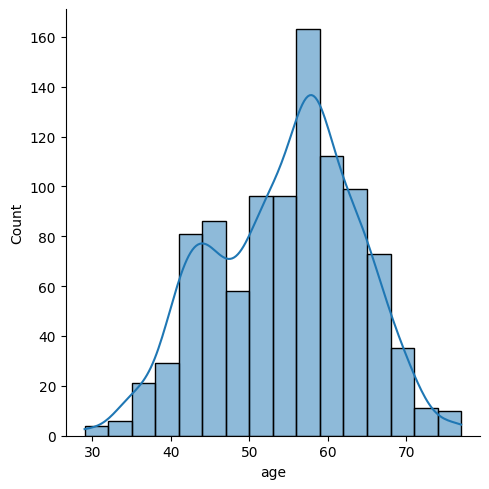

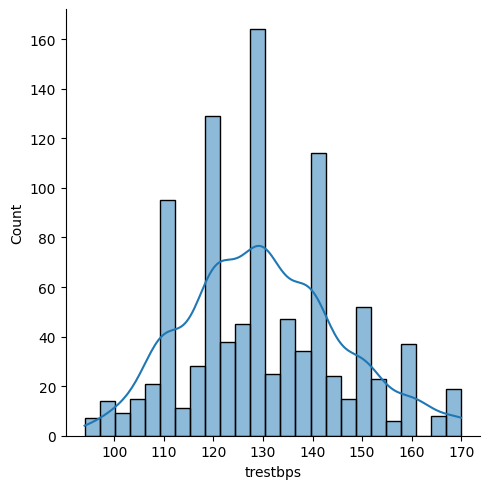

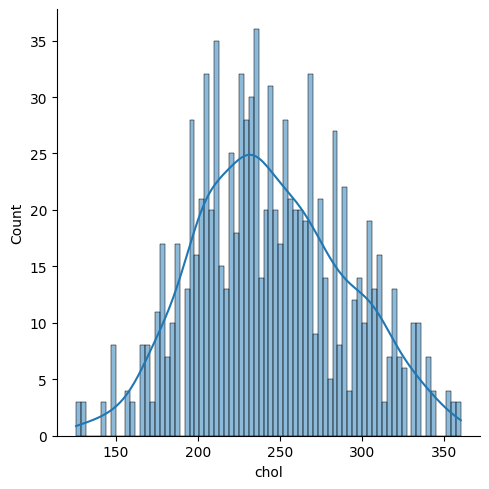

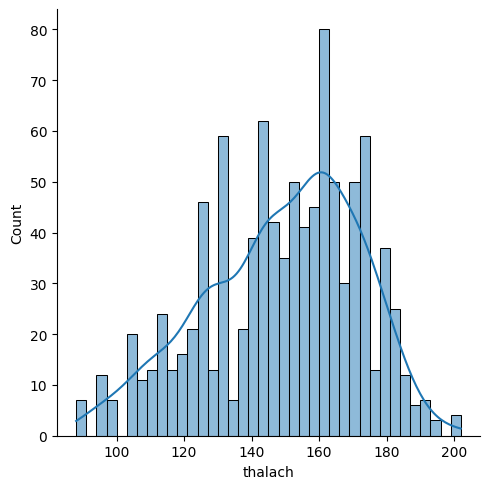

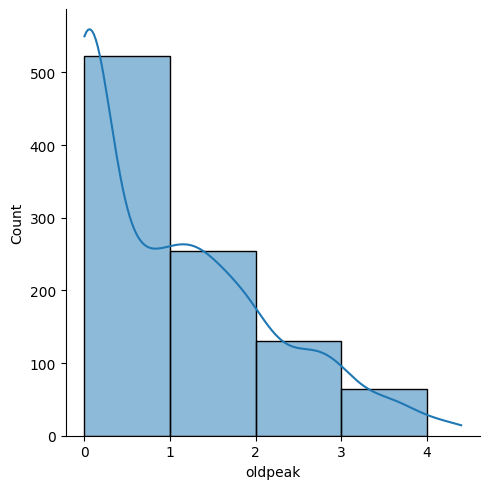

In [ ]:
import seaborn as sns

numerical_feature = data.select_dtypes(exclude='category')

for col in numerical_feature.columns:
  if col == 'oldpeak':
   sns.displot(numerical_feature, x='oldpeak', bins=[0, 1, 2, 3, 4], kde=True)
  else:
   sns.displot(numerical_feature, x=col, binwidth=3, kde=True)

## **Korelasi fitur.**

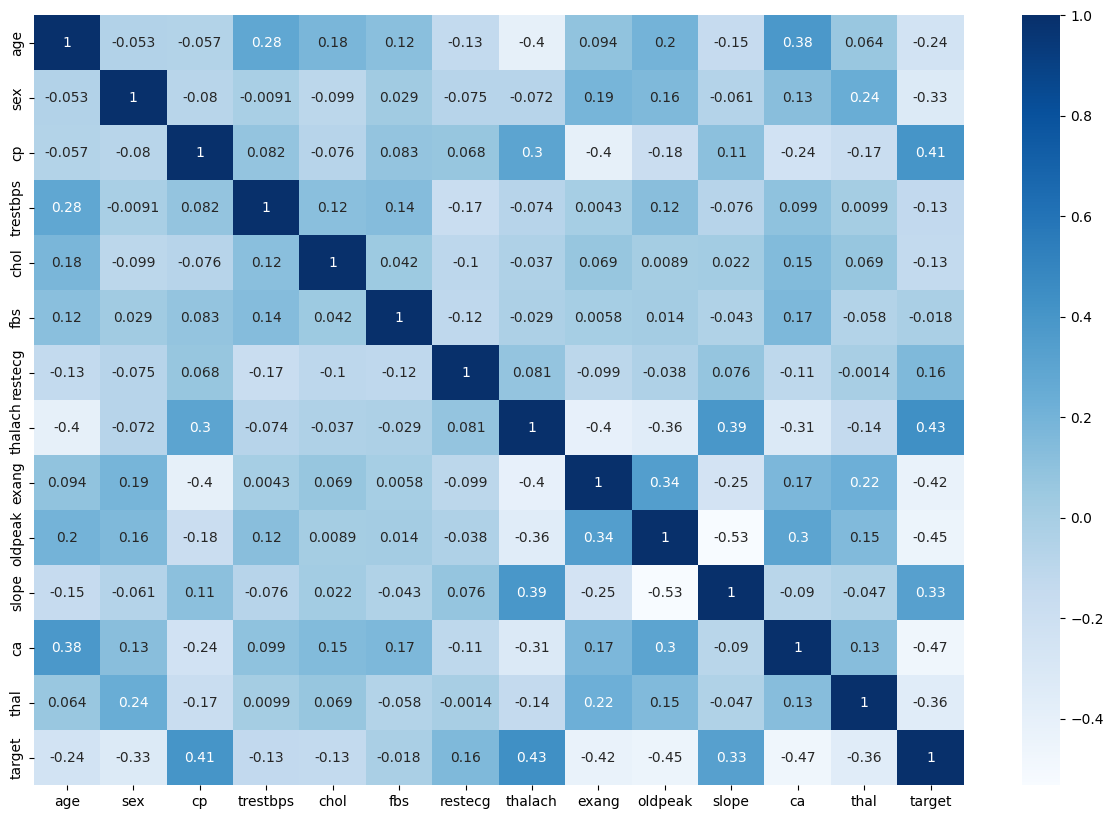

In [ ]:
import matplotlib.pyplot as plt

corr = data.corr(numeric_only=False)

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="Blues")

plt.show()

# **Feature Engineering**

## **Menambah fitur kategori umur berdasarkan fitur age.**

In [ ]:
bins = [0, 35, 55, 75, float('inf')]
age_labels = ['young', 'adult', 'middle_aged', 'elderly']

data['age_category'] = pd.cut(
    data['age'],
    bins=bins,
    labels=age_labels
)

display(data.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,adult
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,adult
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,middle_aged
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,middle_aged
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,middle_aged


## **Menambah fitur level kolesterol berdasarkan fitur chol.**

In [ ]:
bins = [0, 200, 240, float('inf')]
chol_labels = ['normal', 'above_normal', 'high']

data['chol_level_category'] = pd.cut(
    data['chol'],
    bins=bins,
    labels=chol_labels
)

display(data.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,chol_level_category
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,adult,above_normal
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,adult,above_normal
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,middle_aged,normal
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,middle_aged,above_normal
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,middle_aged,high


## **Label Encoding**



In [ ]:
def get_mapping_by_level (categories):
  map = {}
  for i, val in enumerate(categories):
    map[val] = i+1
  return map

In [ ]:
# Age
age_map = get_mapping_by_level(age_labels)
data['age_category'] = data['age_category'].map(age_map)
data['age_category'] = data['age_category'].astype('category')

# Chol
chol_map = get_mapping_by_level(chol_labels)
data['chol_level_category'] = data['chol_level_category'].map(chol_map)
data['chol_level_category'] = data['chol_level_category'].astype('category')

display(data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,chol_level_category
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,2,2
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,2,2
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,3,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,3,2
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,58,1,1,120,284,0,0,160,0,1.8,1,0,2,0,3,3
976,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0,3,3
977,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0,3,3
978,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0,2,3


## **Menghapus fitur yang tidak digunakan**



In [ ]:
data = data.drop('age', axis=1)
data = data.drop('chol', axis=1)

## **Normalisasi fitur numeric dengan min max scaler.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_feature = data.select_dtypes(exclude='category').columns

scaler = MinMaxScaler()
data[numerical_feature] = scaler.fit_transform(data[numerical_feature])

display(data.head())

,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,chol_level_category
0,1,0,0.407895,0,1,0.701754,0,0.227273,2,2,3,0,2,2
1,1,0,0.605263,1,0,0.587719,1,0.704545,0,0,3,0,2,2
2,1,0,0.671053,0,1,0.324561,1,0.590909,0,0,3,0,3,1
3,1,0,0.710526,0,1,0.640351,0,0.000000,2,1,3,0,3,2
4,0,0,0.578947,1,1,0.157895,0,0.431818,1,3,2,0,3,3


## **Fitur final.**

In [ ]:
data.info()

print('\n')

display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   sex                  980 non-null    category
 1   cp                   980 non-null    category
 2   trestbps             980 non-null    float64 
 3   fbs                  980 non-null    category
 4   restecg              980 non-null    category
 5   thalach              980 non-null    float64 
 6   exang                980 non-null    category
 7   oldpeak              980 non-null    float64 
 8   slope                980 non-null    category
 9   ca                   980 non-null    category
 10  thal                 980 non-null    category
 11  target               980 non-null    category
 12  age_category         980 non-null    category
 13  chol_level_category  980 non-null    category
dtypes: category(11), float64(3)
memory usage: 35.2 KB




,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,chol_level_category
0,1,0,0.407895,0,1,0.701754,0,0.227273,2,2,3,0,2,2
1,1,0,0.605263,1,0,0.587719,1,0.704545,0,0,3,0,2,2
2,1,0,0.671053,0,1,0.324561,1,0.590909,0,0,3,0,3,1
3,1,0,0.710526,0,1,0.640351,0,0.000000,2,1,3,0,3,2
4,0,0,0.578947,1,1,0.157895,0,0.431818,1,3,2,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,1,1,0.342105,0,0,0.631579,0,0.409091,1,0,2,0,3,3
976,1,2,0.605263,0,1,0.614035,0,0.000000,2,0,2,0,3,3
977,1,0,0.763158,0,1,0.000000,1,0.272727,1,1,3,0,3,3
978,1,0,0.605263,0,1,0.280702,1,0.409091,1,2,3,0,2,3


# **Modelling**

Untuk studi kasus data heart disease disini akan menggunakan metode klasifikasi. <br>
Model disini saya akan menggunakan Decission Tree, kenapa memakai Decission Tree ?

- Decision tree mudah dipahami dan diinterpretasikan. Struktur pohon yang dihasilkan dapat dengan jelas menunjukkan alur pengambilan keputusan dan faktor-faktor yang mempengaruhi keputusan tersebut
- Decision tree dapat mengatasi baik data numerik maupun kategorikal
- Decision tree dapat menangani keputusan yang melibatkan fitur-fitur nonlinear
- Fitur class DecisionTreeClassifier dari sklearn yang banyak

## **Splitting data.**

Sebelum melakukan modelling, akan dilakukan splitting data terlebih dahulu dengan proporsi data test 20%.

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f'Jumlah data asli  : {len(X)}')
print(f'Jumlah data train : {len(X_train)}')
print(f'Jumlah data test  : {len(X_test)}')

Jumlah data asli  : 980
Jumlah data train : 784
Jumlah data test  : 196


## **Oversampling train data.**

In [ ]:
print(y_train.value_counts())

target
0    397
1    387
Name: count, dtype: int64


Terdapat perbedaan 10 data antara data target 0 dan 1, untuk menyeimbangkan data itu maka akan dilakukan balancing menggunakan metode oversampling.

In [ ]:
oversampler = RandomOverSampler()

X_train, y_train = oversampler.fit_resample(
    X_train, y_train
)

In [ ]:
print(y_train.value_counts())

target
0    397
1    397
Name: count, dtype: int64


## **Trainning data dengan parameter default.**

### **Buat objek model dengan parameter default.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_leaf_nodes=13)

In [ ]:
display(clf.get_params())

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 13,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Disini saya akan menggunakan parameter bawaan kecuali max_leaf_nodes dengan nilai 13 (sesuai jumlah kolom fitur).

### **Fitting model dan melakukan prediksi.**

In [ ]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

### **Confussion matrix model parameter default.**

In [ ]:
import seaborn as sns

def show_confussion_matrix (matrix):

  ax = sns.heatmap(matrix, annot=True, cmap='Blues')

  ax.set_title('Confusion Matrix');
  ax.set_xlabel('Predicted Values')
  ax.set_ylabel('Actual Values ');

  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  plt.show()

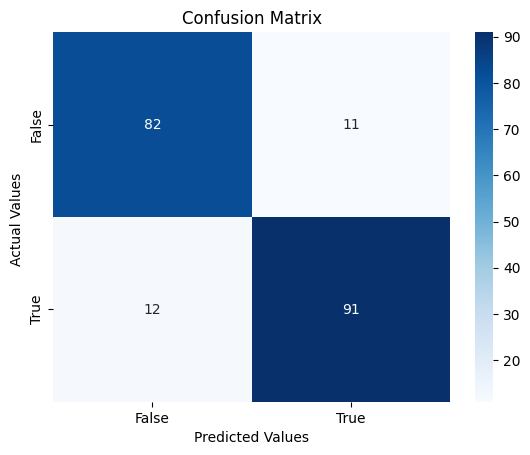

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

show_confussion_matrix(cm)

### **Classification report parameter default.**

In [ ]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88        93
           1       0.89      0.88      0.89       103

    accuracy                           0.88       196
   macro avg       0.88      0.88      0.88       196
weighted avg       0.88      0.88      0.88       196



Terlihat pada confussion matrix maupun classification report, model sudah cukup baik dengan akurasi dan recall lebih dari 85.<br>
Dalam studi kasus ini, recall akan sangat diperhatikan, recall menghitung false negative (actual positive, predicted negative).<br>
Karena jika orang mendapat prediksi false negative maka akan berbahaya.

### **Mean error parameter default.**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def show_mean_error (model, X_train, X_test, y_train, y_test):
  y_pred_train = model.predict(X_train)

  MSE = mean_squared_error(y_train, y_pred_train)
  MAE = mean_absolute_error(y_train, y_pred_train)

  print(f'Mean Squared Error Data Train  : {MSE}')
  print(f'Mean Absolute Error Data Train : {MAE}')
  print('\n')

  y_pred_test = model.predict(X_test)

  MSE = mean_squared_error(y_test, y_pred_test)
  MAE = mean_absolute_error(y_test, y_pred_test)

  print(f'Mean Squared Error Data Test  : {MSE}')
  print(f'Mean Absolute Error Data Test : {MAE}')

In [ ]:
show_mean_error(clf, X_train, X_test, y_train, y_test)

Mean Squared Error Data Train  : 0.09697732997481108
Mean Absolute Error Data Train : 0.09697732997481108


Mean Squared Error Data Test  : 0.11734693877551021
Mean Absolute Error Data Test : 0.11734693877551021


Terlihat dari mean error, model sudah cukup baik dengan nilai error yang kecil namun perbedaan nilai error masih cukup besar antara data train dan data test yang menunjukkan model masih sedikit overfit.

### **Cross validation parameter default.**

In [ ]:
from sklearn.model_selection import cross_val_score

def get_cross_validation_result (model, X, y, stratified_kfold):
  scores = cross_val_score(
      estimator=model,
      X=X,
      y=y,
      cv=stratified_kfold,
      scoring='recall'
  )

  print(f'Hasil Cross-Validation : {scores}')
  print(f'Rata-rata Skor         : {scores.mean():.4f}')
  print(f'Simpangan baku Skor    : {scores.std():.4f}')

Disini untuk skoring akan menggunakan recall karena dalam studi kasus prediksi pengidap penyakit jantung ini skor recall akan sangat diperhatikan.

In [ ]:
from sklearn.model_selection import StratifiedKFold

stratified_kfold = StratifiedKFold(n_splits=5)

get_cross_validation_result(clf, X, y, stratified_kfold)

Hasil Cross-Validation : [0.76530612 0.89795918 0.86734694 0.93877551 0.83673469]
Rata-rata Skor         : 0.8612
Simpangan baku Skor    : 0.0587


Pada cross validation terlihat model sudah cukup baik dengan rata" skor recall 0.86 dan simpangan baku kurang dari 0.1.

## **Hyper parameter tunning.**

Tunning model dengan metode hyper parameter menggunakan library GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

hyperparameters = dict(
    criterion = ['gini', 'entropy', 'log_loss'],
    splitter = ['best', 'random'],
    max_depth = [10, 20, 25, 30],
    max_leaf_nodes = [10, 18, 20, 25, 30]
)

grid_search = GridSearchCV(
    clf,
    hyperparameters,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

print('Best Hyperparameters: ', grid_search.best_params_)
print('Best Score: {:.2f}'.format(grid_search.best_score_))

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 30, 'splitter': 'best'}
Best Score: 0.93


Terlihat Best Hyperparameters dengan nilai **{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 30, 'splitter': 'best'}**.<br>
Selanjutnya akan men-training model lagi dengan parameter tersebut.

### **Trainning ulang dan melakukan prediksi menggunakan parameter hasil tunning.**

In [ ]:
clf_new = DecisionTreeClassifier(
    criterion='gini',
    max_depth=20,
    max_leaf_nodes=30,
    splitter='best'
)

clf_new.fit(X_train, y_train)

y_pred_new = clf_new.predict(X_test)

### **Confussion matrix setelah tunning.**

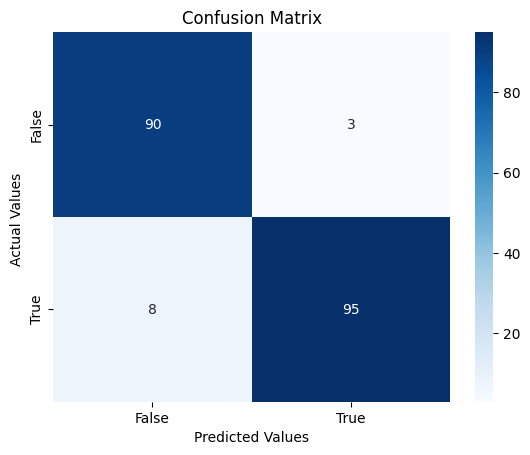

In [ ]:
cm = confusion_matrix(y_test, y_pred_new)

show_confussion_matrix(cm)

### **Classification report setelah tunning.**

In [ ]:
cr = classification_report(y_test, y_pred_new)

print(cr)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        93
           1       0.97      0.92      0.95       103

    accuracy                           0.94       196
   macro avg       0.94      0.95      0.94       196
weighted avg       0.95      0.94      0.94       196



Terlihat pada confussion matrix maupun classification report, model sudah bagus dari segi akurasi maupun recall.

### **Mean error setelah tunning.**

In [ ]:
show_mean_error(clf_new, X_train, X_test, y_train, y_test)

Mean Squared Error Data Train  : 0.03526448362720403
Mean Absolute Error Data Train : 0.03526448362720403


Mean Squared Error Data Test  : 0.05612244897959184
Mean Absolute Error Data Test : 0.05612244897959184


Pada mean error juga terlihat angka error yang kecil serta perbedaan error data train dan data test juga kecil yang menunjukkan model dalam kondisi good fit.

### **Cross Validation setelah tunning.**

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=5)

get_cross_validation_result(clf_new, X, y, stratified_kfold)

Hasil Cross-Validation : [0.94897959 0.90816327 0.91836735 0.89795918 0.92857143]
Rata-rata Skor         : 0.9204
Simpangan baku Skor    : 0.0176


Pada cross validation juga terlihat bahwa model memiliki rata" skor recall yang baik dan simpangan baku skor recall yang kecil.

## **Model Interpretation.**

### **Feature importance.**

In [ ]:
feature_importance_df = pd.DataFrame({
    'Feature': clf_new.feature_names_in_,
    'Importance': clf_new.feature_importances_
})

feature_importance_df = feature_importance_df.sort_values(
    by = 'Importance',
    ignore_index = True,
    ascending = False
)

display(feature_importance_df)

,Feature,Importance
0,cp,0.291148
1,ca,0.180148
2,thal,0.129124
3,oldpeak,0.081384
4,trestbps,0.080112
5,age_category,0.053170
6,chol_level_category,0.049484
7,sex,0.040639
8,thalach,0.030767
9,exang,0.021542


In [ ]:
feature_importance_df['Importance'] = feature_importance_df['Importance'].round(4)
feature_importance_df = feature_importance_df.sort_values(
    by='Importance',
    ignore_index=True,
    ascending=True
)

# Buat bar horizontal
fig = px.bar(
    feature_importance_df,
    x='Importance',
    y='Feature',
    orientation='h',
    text='Importance',
    color_discrete_sequence=['#E78895'],
)

# Update warna anotasi menjadi putih
fig.update_traces(
    textfont_color='white'
)

# Proses update layout
fig.update_layout(
    width=1200,
    height=600,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    showlegend=False,
    title=dict(
        text = '<b>Feature Importances</b><br><sup><sup>hasil Model Decission Tree</sup></sup>',
        font = dict(
            size = 30,
            color = 'black'
        ),
        x=0.03
    ),
    xaxis=dict(
        title = ''
    ),
    yaxis=dict(
        title = ''
    ),
    margin=dict(
        t = 100,
        l = 100,
        b = 100,
        r = 100
    )
)

fig.show()

Fitur importance yang ada di model :
- cp, chest pain type (tipe nyeri dada) : Menurut saya sangat berkolerasi karena gejala penyakit jantung biasanya adalah nyeri dada
- ca, number of major vessels (0-3) colored by flourosopy
- thal, 0 = normal; 1 = fixed defect; 2 = reversable defect
- oldpeak, ST depression induced by exercise relative to rest

### **Plotting model.**

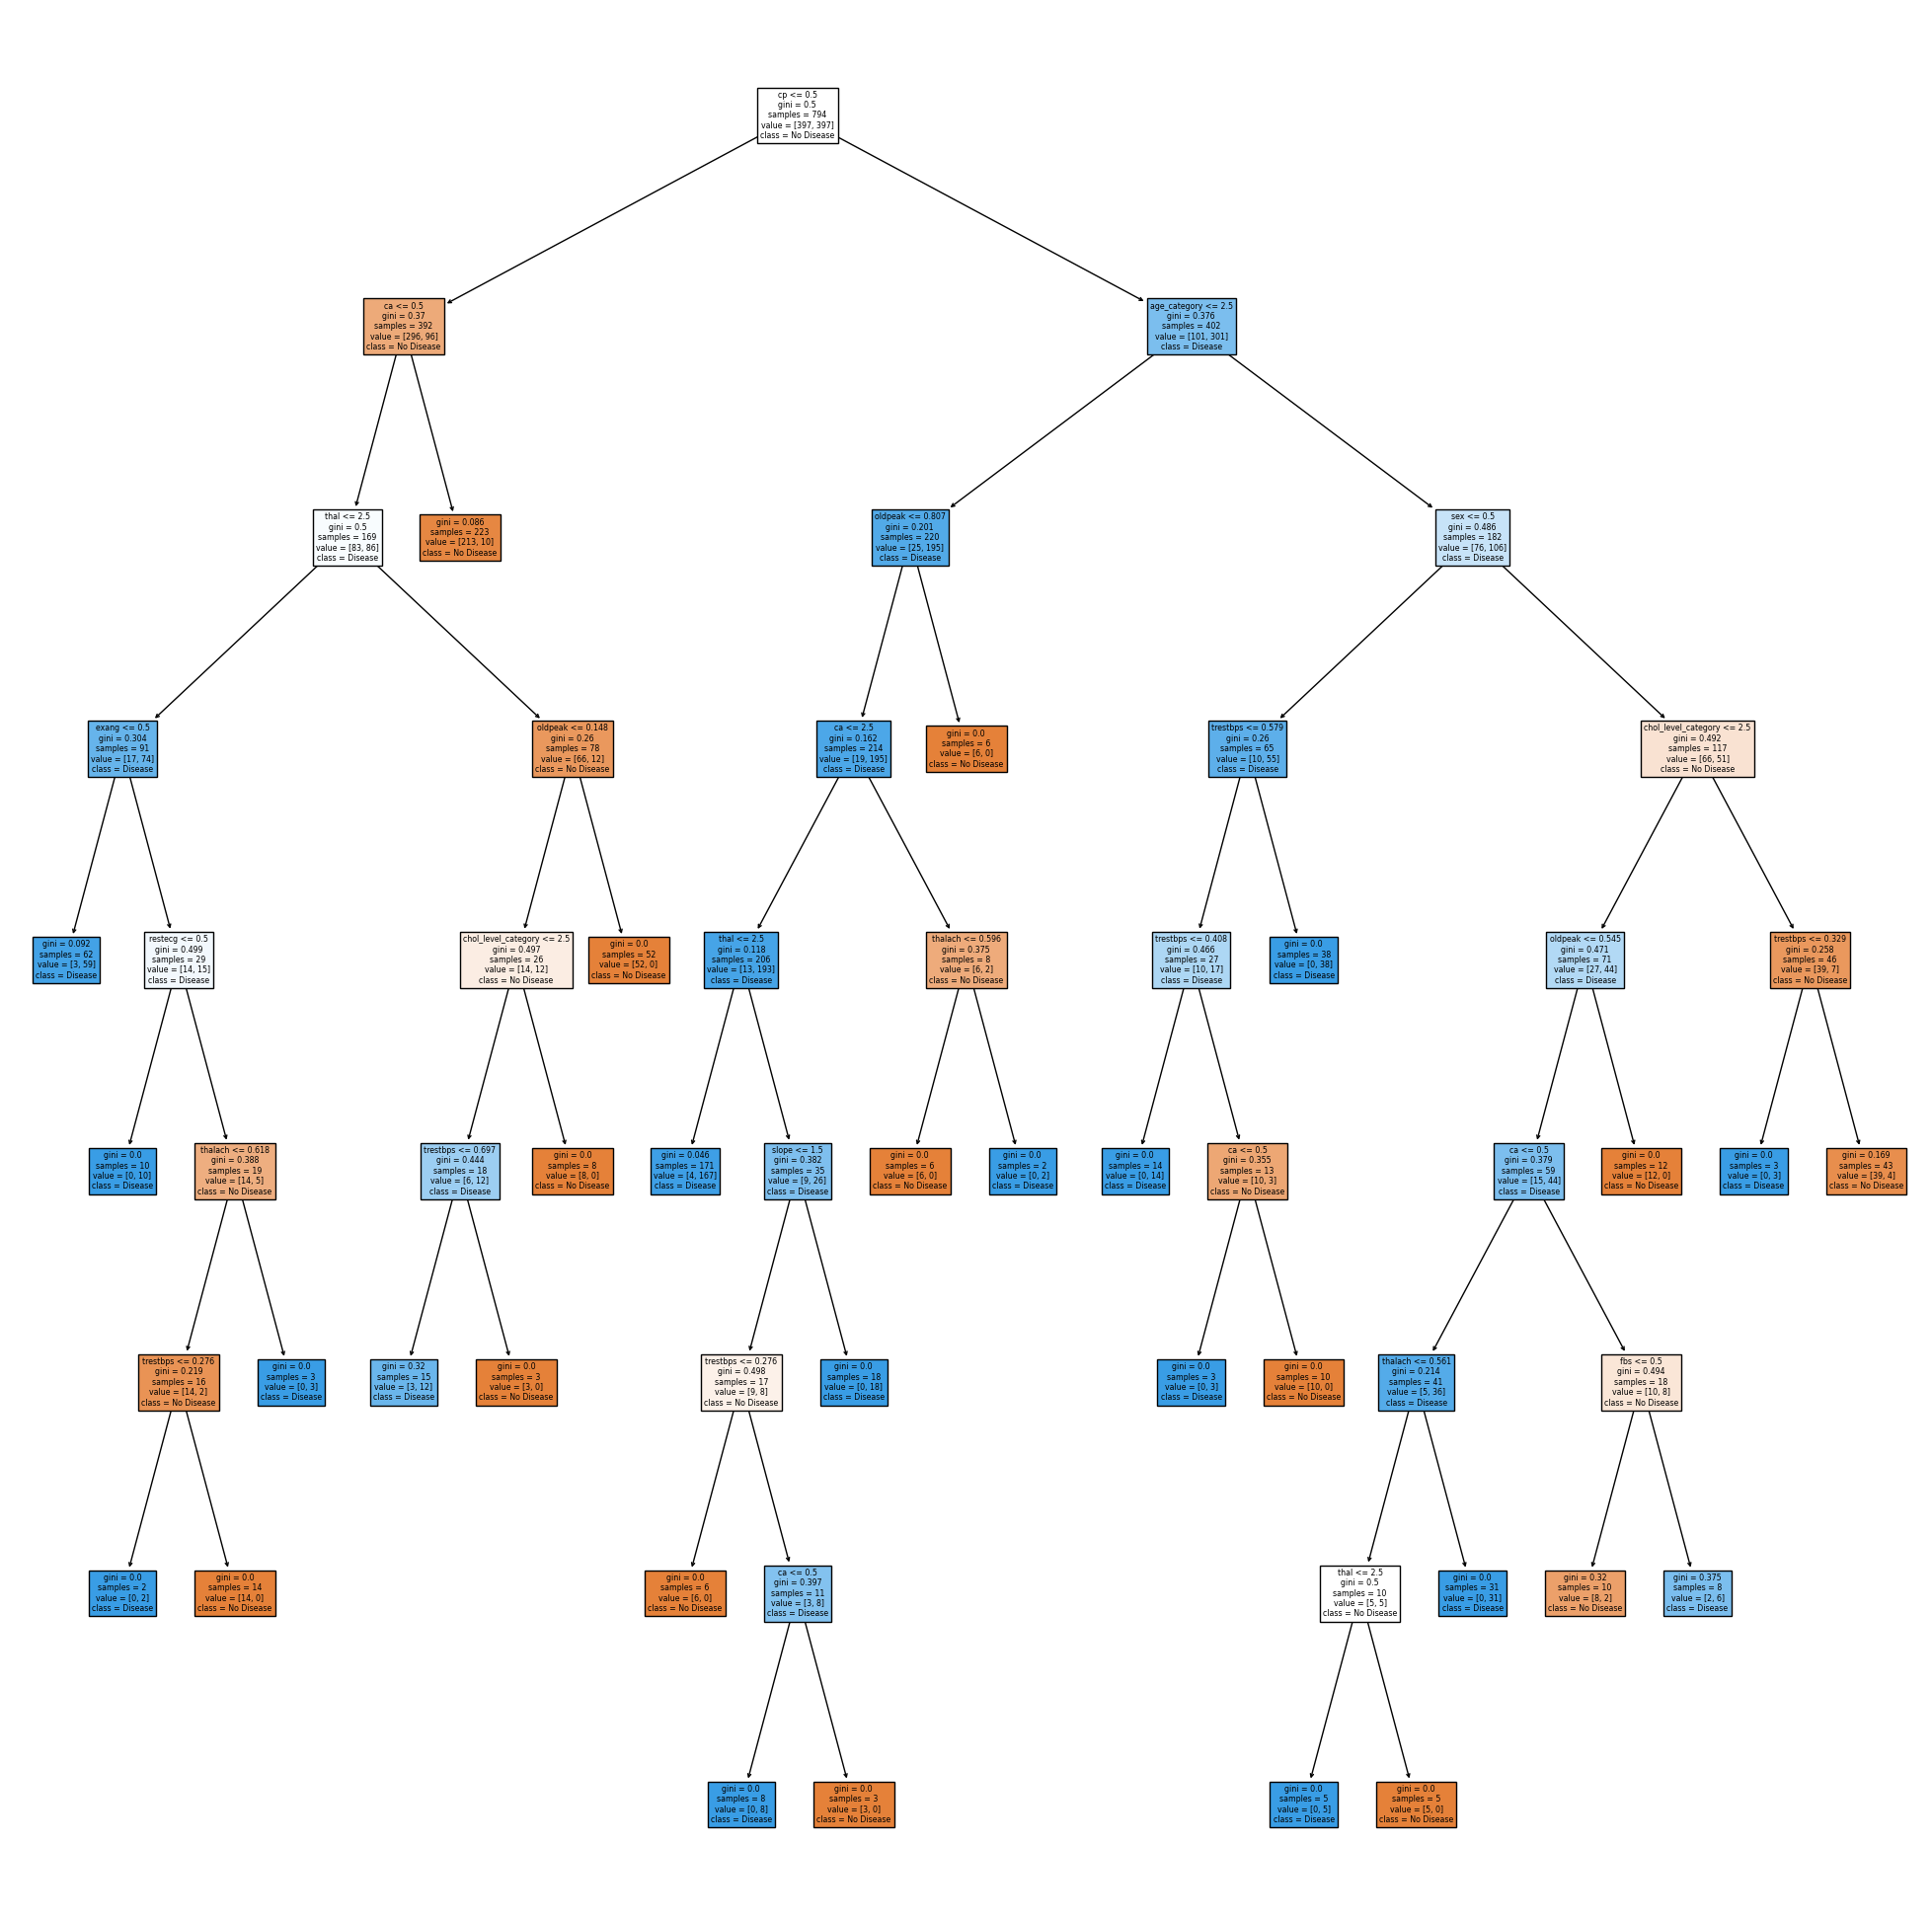

In [ ]:
from sklearn import tree

# Membuat plot pohon keputusan
fig, ax = plt.subplots(figsize=(25, 25))

tree.plot_tree(
    clf_new,
    feature_names=clf.feature_names_in_,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=False
)

plt.show()

Disini model memiliki node yang cukup banyak dan sedikit kompleks.<br>
Untuk layer pertama ada perbandingan fitur cp, lalu layer kedua ada ca dan age_category.

## **Learning Curve Model.**

In [ ]:
import numpy as np

# Bagi data menjadi
train_size = np.linspace(0.1, 1.0, 10)

print(train_size)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [ ]:
from sklearn.model_selection import learning_curve

stratified_kfold = StratifiedKFold(
    n_splits = 5
)

# Proses menghitung learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=clf_new,
    X=X,
    y=y,
    cv=stratified_kfold,
    train_sizes=train_size,
    scoring='recall'
)

Disini akan dibuat learning curve berdasarkan skoring recall.

In [ ]:
hasil_pelatihan = pd.DataFrame(
    train_scores,
    columns = ['fold-' + str(i + 1) for i in range(len(train_scores[0]))],
    index = ['train_size = ' + str(round(i, 2)) for i in train_sizes]
)

hasil_pelatihan['mean'] = hasil_pelatihan.mean(axis=1)

display(hasil_pelatihan)

,fold-1,fold-2,fold-3,fold-4,fold-5,mean
train_size = 78,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
train_size = 156,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
train_size = 235,0.992701,0.992701,1.000000,1.000000,1.000000,0.997080
train_size = 313,0.994382,1.000000,0.994152,0.994152,0.994152,0.995368
train_size = 392,0.990654,0.976636,0.948980,0.990476,0.990476,0.979444
train_size = 470,0.968750,0.984375,0.984375,0.960784,0.960784,0.971814
train_size = 548,0.972881,0.983051,0.976271,0.969388,0.969388,0.974196
train_size = 627,0.990937,0.981873,0.981873,0.987915,0.975904,0.983700
train_size = 705,0.991935,0.956989,0.951613,0.986559,0.984085,0.974236
train_size = 784,0.964286,0.954082,0.959184,0.984694,0.964286,0.965306


### **Score by train size.**

In [ ]:
result_learningcurve = pd.DataFrame({
    'train_size' : train_sizes,
    'train_score' : train_scores.mean(axis=1),
    'test_score' : test_scores.mean(axis=1)
})

display(result_learningcurve)

,train_size,train_score,test_score
0,78,1.000000,0.751020
1,156,1.000000,0.800000
2,235,0.997080,0.822449
3,313,0.995368,0.891837
4,392,0.979444,0.908163
5,470,0.971814,0.908163
6,548,0.974196,0.912245
7,627,0.983700,0.940816
8,705,0.974236,0.926531
9,784,0.965306,0.928571


### **Plot learning curve.**

In [ ]:
import plotly.express as px

# Membuat plot garis dengan Plotly Express
fig = px.line(
    result_learningcurve,
    x='train_size',
    y=['train_score', 'test_score']
)

# Update layout
fig.update_layout(
    height=650,
    width=1100,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    yaxis=dict(
        title = 'Recall',
        showline = True,
        linewidth = 1,
        color = '#544018',
        linecolor = '#544018'
    ),
    xaxis=dict(
        title = 'Train Size',
        showline = True,
        linewidth = 1,
        color = '#544018',
        linecolor = '#544018'
    ),
    title=dict(
        text = '<b>Learning Curve pada Model Decission Tree</b>',
        font = dict(
            family = 'sans serif',
            size = 30,
        ),
        y = 0.98
    )
)

fig.show()

Pada grafik learning curve diatas dapat disimpulkan :

- Jumlah data train yang rendah akan menimbulkan overfitting
- Semakin banyak data train maka akan semakin bagus modelnya dan akan sangat baik menggeneralisir data
- Model sudah good fitting